<a href="https://colab.research.google.com/github/Takouabelwafa/Machine_Learning/blob/main/Task1_pr%C3%A9direLesDefauts_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Test technique Machine learning:**

**Qu'est-ce que XGBoost ?**                                                        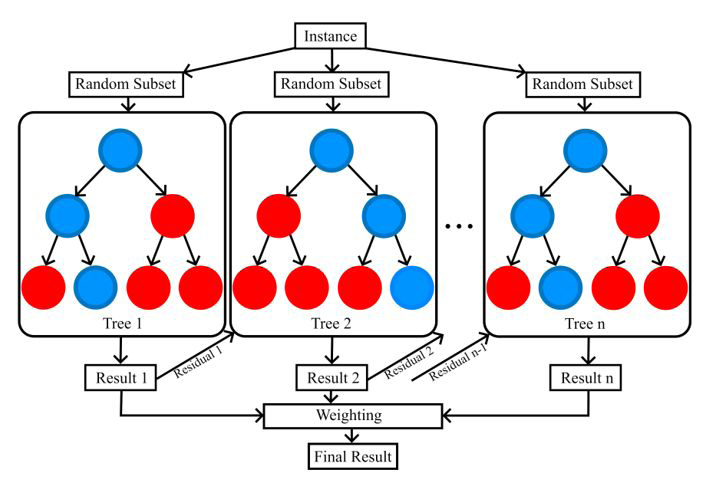                                
XGBoost (eXtreme Gradient Boosting) est une bibliothèque de machine learning distribuée et open source qui utilise des arbres de décision auxquels est appliqué le boosting de gradient, ce dernier étant un algorithme de boosting d'apprentissage supervisé qui utilise la descente de gradient. Il est connu pour sa vitesse, son efficacité et sa capacité à s'adapter à de grands jeux de données.

task1 :
Dataset
[UCI Credit Default Dataset](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)


In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report
import warnings

In [ ]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"


df = pd.read_excel(url,header=1)

print(df.shape)
df.head()


(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

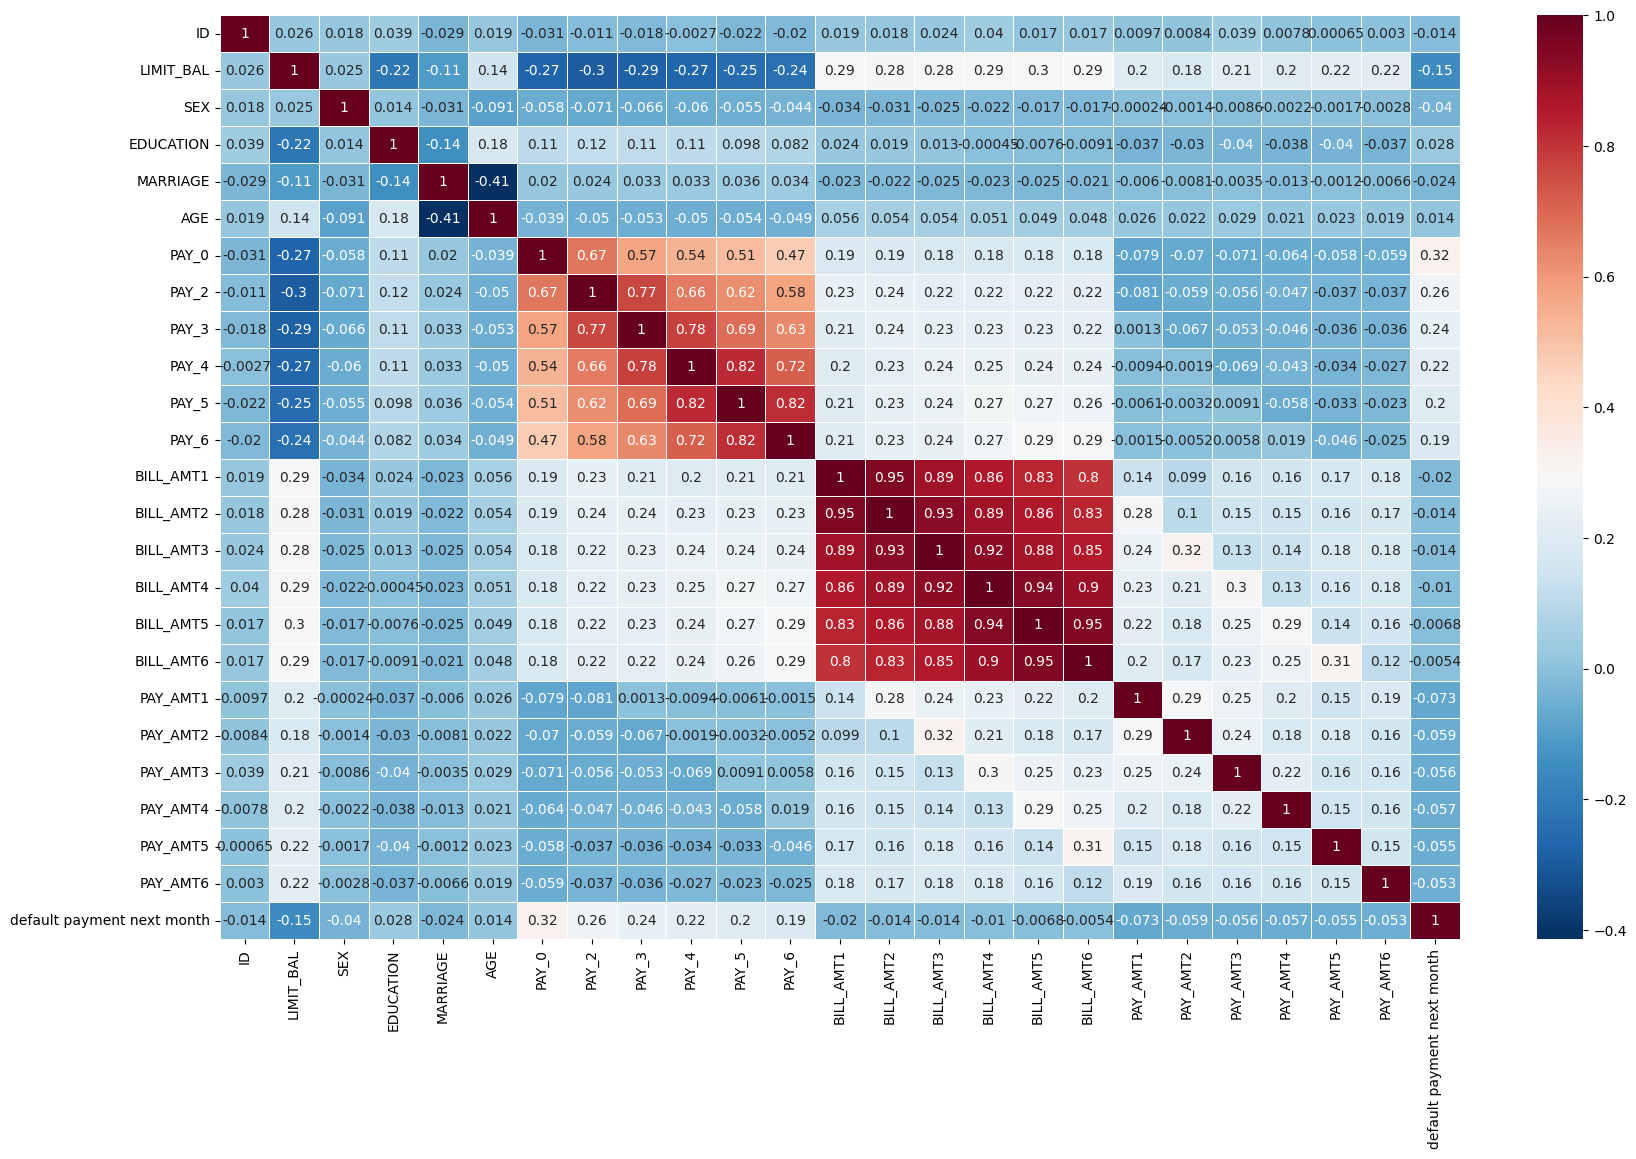

In [ ]:
## Show correlation
fig, ax = plt.subplots(figsize = (20, 12)) #Size of plot
ax = sns.heatmap(df.corr(),cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show()

# •Feature engineering (âge, montant, historique)


In [ ]:
df1=pd.DataFrame()
# garder le profile de client
df1['AGE']=df['AGE']
df1['default payment next month']=df['default payment next month']
df1['SEX']=df['SEX']
df1['EDUCATION']=df['EDUCATION']
df1['MARIAGE']=df['MARRIAGE']
#ajouter variable PAY_mean  désigne le comportement de payment de chaque mois
df1['PAY_mean'] = df[[f'PAY_{i}' for i in [0, 2, 3, 4, 5, 6]]].mean(axis=1)
# Ajouter une variable  désigne Factures semesterielle
df1['sum_BILL_AMT'] = df[[f'BILL_AMT{i}' for i in range(1,7)]].sum(axis=1)
# le montant payé par le client.
df1['PAY_AMT_somme'] =df[[f'PAY_AMT{i}' for i in range(1,7)]].sum(axis=1)



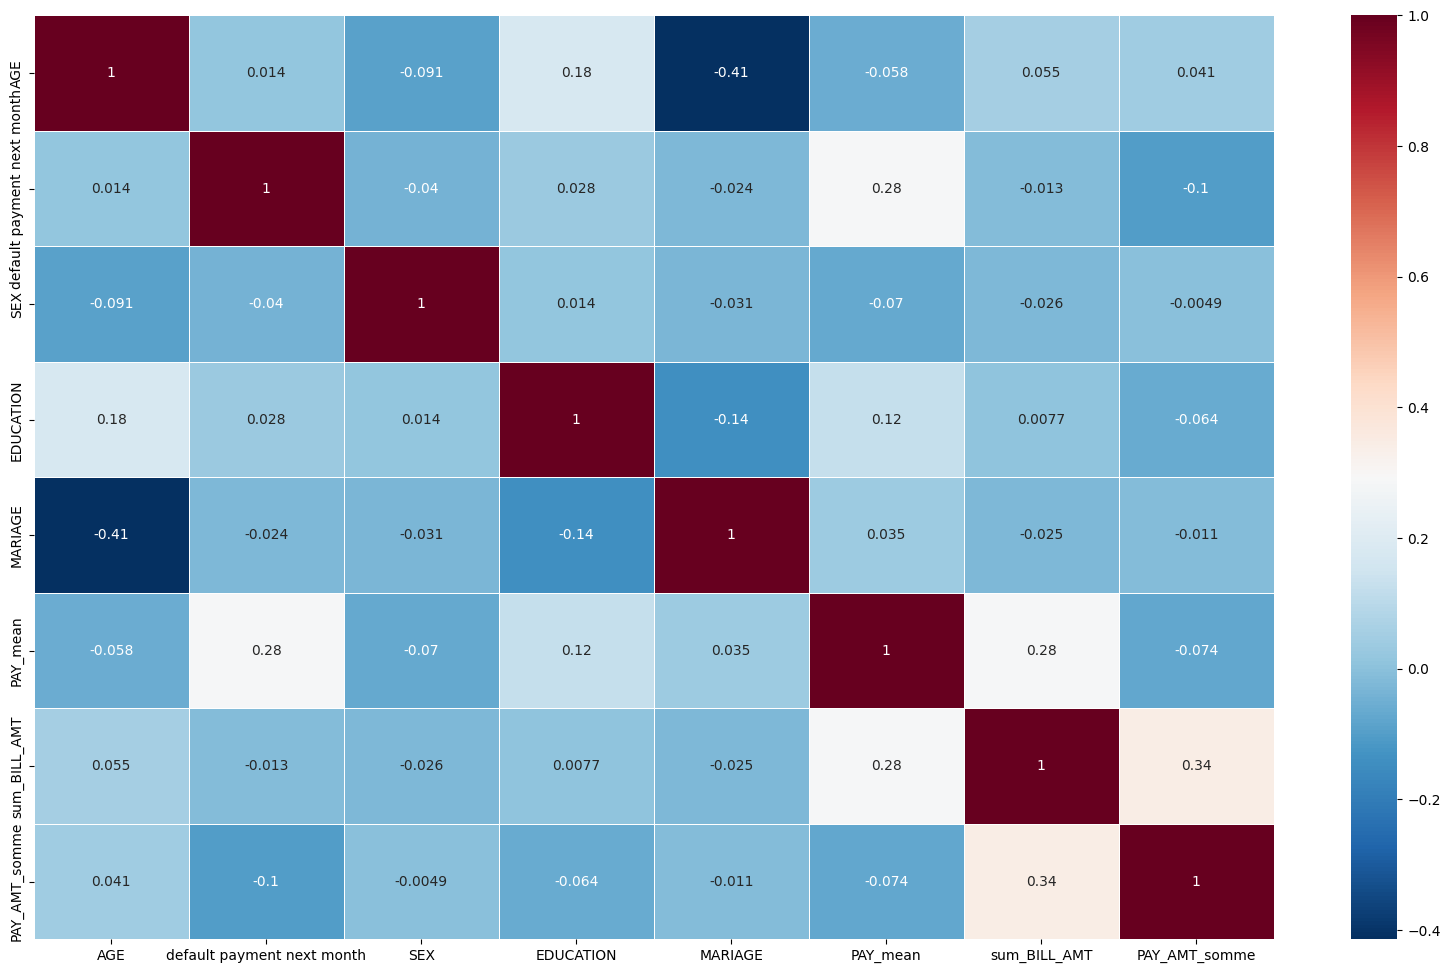

In [ ]:
## Show correlation
fig, ax = plt.subplots(figsize = (20, 12)) #Size of plot
ax = sns.heatmap(df1.corr(),cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show()

## •Gérer les valeurs manquantes

In [ ]:
#verifier si il existe des valeurs manquantes
df1.isnull().sum()

,0
AGE,0
default payment next month,0
SEX,0
EDUCATION,0
MARIAGE,0
PAY_mean,0
sum_BILL_AMT,0
PAY_AMT_somme,0


Création de model


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
# Diviser le dataset en X et y
X = df1.drop('default payment next month', axis=1)
y = df1['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = XGBClassifier( eval_metric='logloss')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:}")

Précision du modèle : 0.7998888888888889


# •Optimiser les hyperparamètres (max_depth, learning_rate, n_estimators)

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


# Diviser en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir le modèle
xgb = XGBClassifier(eval_metric='mlogloss')

# Définir la grille de recherche

param_grid = {
    'max_depth': [1, 2, 3],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150]
}

# Validation croisée
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

# Accuracy
print("Best parameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
Best accuracy: 0.806


# •Importance des variables

<Figure size 1000x800 with 0 Axes>

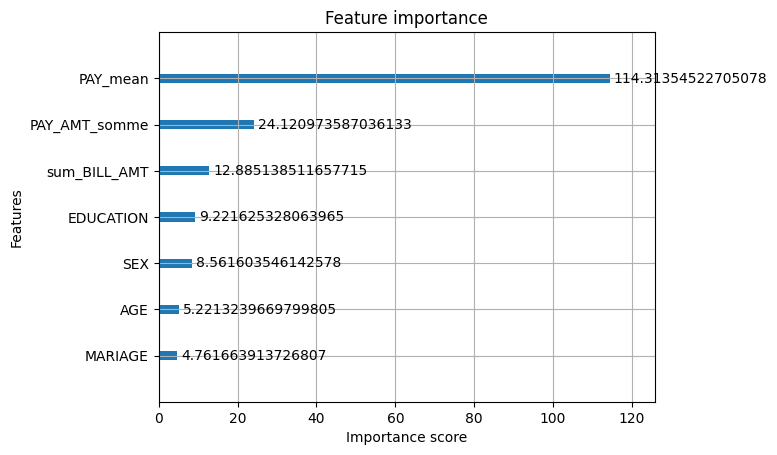

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Supposons que ton modèle entraîné s'appelle grid.best_estimator_
model = grid.best_estimator_

# Visualiser l'importance des features
plt.figure(figsize=(10,8))
plot_importance(model, importance_type='gain', max_num_features=10)
plt.show()

# •Évaluer avec AUC, F1

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)
# Probabilités de classe pour AUC
y_prob = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {auc:.4f}")
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

AUC-ROC: 0.7618
F1-score: 0.4033
Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4687
           1       0.63      0.30      0.40      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.62      0.64      6000
weighted avg       0.79      0.81      0.78      6000

